In [1]:
import sys
sys.path.append('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/')
import utils
from importlib import reload
reload(utils)
from utils import *

In [2]:
tracking = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_a/regression_rf_rfe_tracking.csv',  index_col=0)
scores = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_a/regression_rf_rfe.csv',  index_col=0)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def plot_resume_rfe(df, title):
    aux=df.copy()
    aux.iloc[:, 0] = aux.iloc[:, 0].fillna(0)
    aux = aux.ffill(axis=1)
    Q3 = np.percentile(aux.iloc[:, -1], 75)
    Q1 = np.percentile(aux.iloc[:, -1], 25)
    IQR = Q3-Q1
    threshold = Q3+IQR*1.5

    first_15 = pd.Series(aux.iloc[:, -1].sort_values(ascending=False).index[:15])
    first_15_str = '\n'.join(map(str, first_15.values))
    
    data = {'x': range(1, df.shape[1]+1)}
    for var in df.index:
        data[var] = np.array(df.loc[var, :])

    data = pd.DataFrame(data)

    # Change the style of plot
    # plt.style.use('seaborn-darkgrid')
    
    # Create a color palette
    palette = plt.get_cmap('PuRd')
    
    # Plot multiple lines
    for n, column in enumerate(data.drop(columns='x')):
        y = data[column].loc[~data[column].isna()]
        x = data['x'].loc[:y.shape[0]-1]
        plt.plot(x, y, marker='', color=palette(n), linewidth=1, alpha=0.9)
        if (not y.empty) and (y.iloc[-1] > threshold):
            plt.annotate(f"{round(y.iloc[-1], 3)}", 
                        xy=(x.iloc[-1], y.iloc[-1]), 
                        xytext=(x.iloc[-1]+1, y.iloc[-1]),
                        fontsize=8)

    ax = plt.gca()  # Get current axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    plt.figtext(1.8, 0.5, f'First 15 variables: \n \n {first_15_str}', ha='right', va='center', fontsize=11)
    
    # Add titles
    plt.title(title, loc='center', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Iterations")
    plt.ylabel("Score")

    # Show the graph
    plt.show()

def plot_resume_scores(df, title):
    fig, ax = plt.subplots(1, 2, figsize=(10,6))
    reg = df.loc[:, [col for col in df.columns if 'adjr2' in col]]
    # reg = pd.DataFrame(np.where(reg < -1, np.nan, reg), index=reg.index, columns = reg.columns)
    # print(reg)
    clas = df.loc[:, [col for col in df.columns if 'accuracy' in col]]
    xreg = range(1, reg.shape[1]+1)
    xclas = range(1, clas.shape[1]+1)

    ax[0].plot(xclas, clas.loc['train', :], color='blue')
    ax[0].plot(xclas, clas.loc['validation', :], color='orange')
    ax[0].grid(True)
    ax[0].set_xticks(xclas)
    ax[0].tick_params(axis='x', labelrotation=90, labelsize=6)
    ax[0].set_title('accuracy')

    ax[1].plot(xreg, reg.loc['train', :], label='train', color='blue')
    # ax1 = ax[1].twinx()
    ax[1].plot(xreg, [r if r > -1 else None for r in reg.loc['validation', :]], label='validation', color='orange')
    ax[1].grid(True)
    ax[1].set_xticks(xreg)
    ax[1].tick_params(axis='x', labelrotation=90, labelsize=6)
    ax[1].set_title('adjusted r2')

    fig.legend(loc='lower center', ncol=2)

    # Adjust layout to make space for the legend
    # fig.tight_layout(rect=[1, 1, 1, 0.9])

    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(title)
    plt.show()


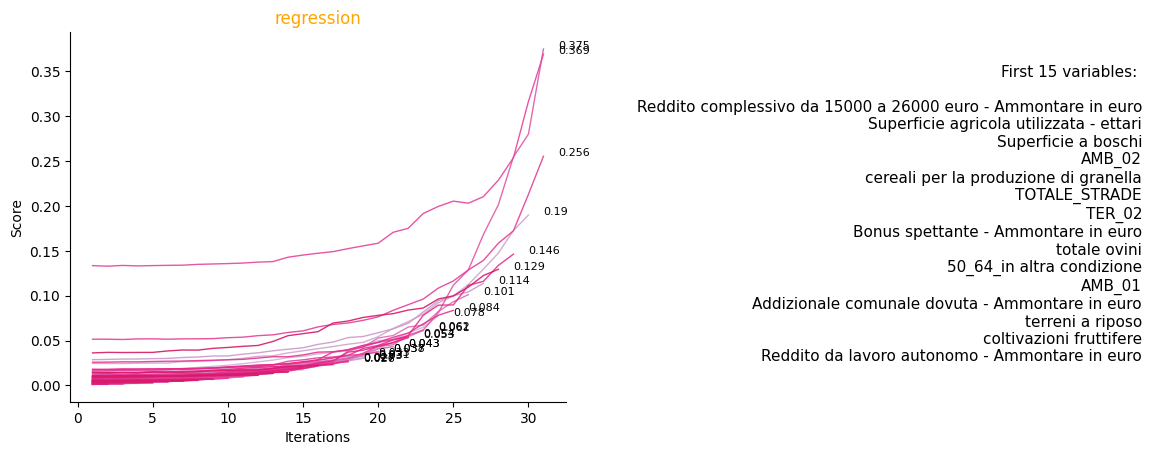

In [4]:
plot_resume_rfe(tracking, title='regression')

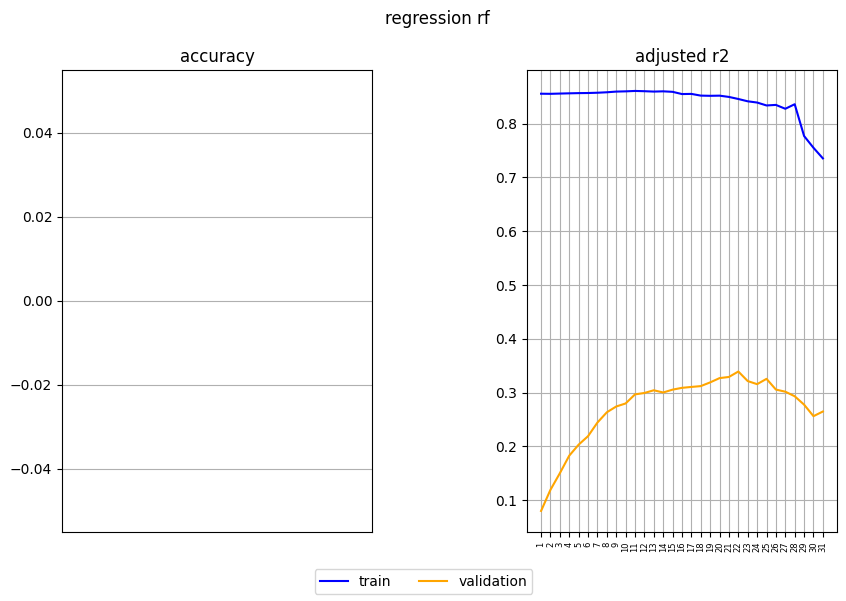

In [5]:
plot_resume_scores(scores, title='regression rf')

In [6]:
X_train_val = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/X_train_val.csv')
X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/X_test.csv')
y_train_val = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/y_train_val.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/y_test.csv')

In [7]:
final_train = X_train_val.loc[:, tracking.index].loc[:, ~tracking['iteration_22'].isna()]
final_test = X_test.loc[:, tracking.index].loc[:, ~tracking['iteration_22'].isna()]

In [8]:
final_train.to_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/final_X_train_val.csv', index=False)
final_test.to_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/final_X_test.csv', index=False)

---

In [9]:
tracking = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_a/classification_rf_rfe_tracking.csv',  index_col=0)
scores = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_a/classification_rf_rfe.csv',  index_col=0)

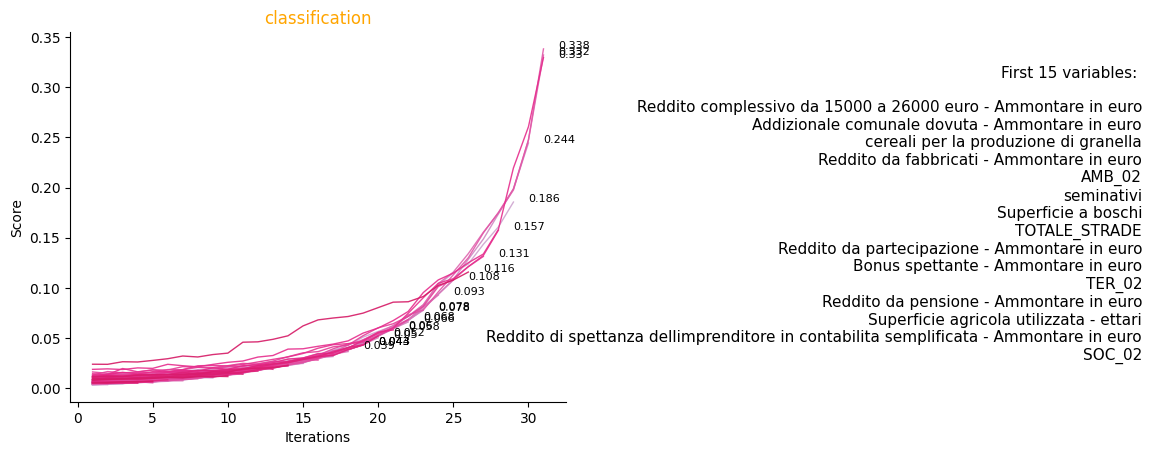

In [10]:
plot_resume_rfe(tracking, title='classification')

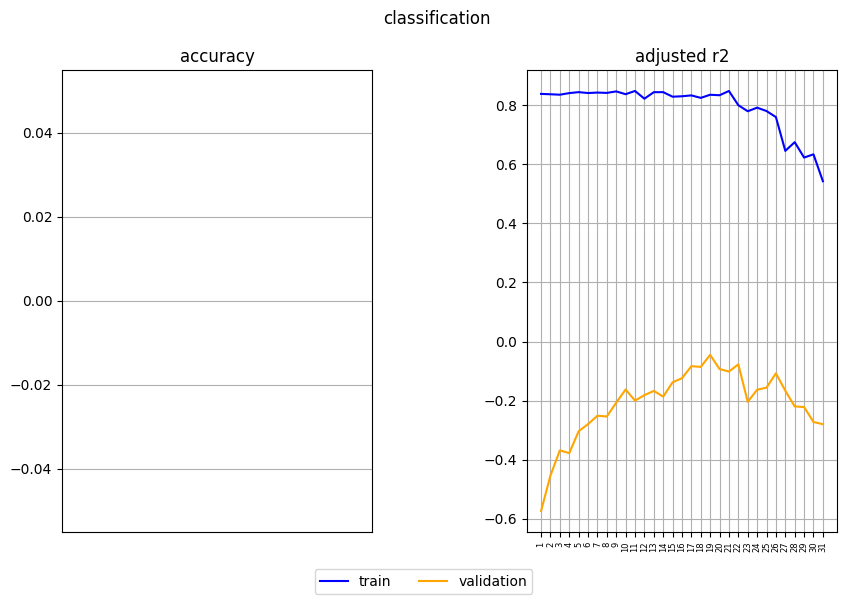

In [11]:
plot_resume_scores(scores, title='classification')